In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

### Section 4.1

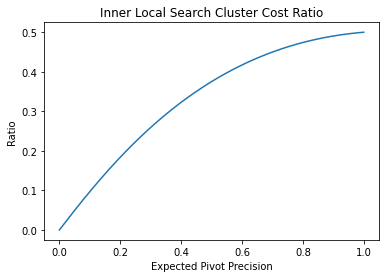

In [2]:
### ILS IMPROVEMENT FOR 0/1 GRAPHS ###

def hybrid_ratio_improvement(p):
    numerator = (1 - (p+1) / 2) * (np.sqrt(p) - (p/2) + p / (p+1))**2 + p - ((p+1)/2)*(np.sqrt(p) - (p/2) + p / (p+1))**2
    return numerator / (1 - p)

SAMPLES = 100000

my_range = range(1, SAMPLES)
x_vals = [i / SAMPLES for i in my_range]
points = [min(hybrid_ratio_improvement(p), 1) for p in x_vals]
approx_pts = [points[i] for i in range(len(points))]

plt.title("Inner Local Search Cluster Cost Ratio")
plt.xlabel("Expected Pivot Precision")
plt.ylabel("Ratio")
plt.plot(x_vals, approx_pts) #, label="sample")
# plt.legend()
plt.show()


### Section 5.2

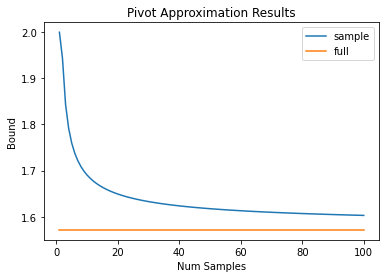

1.433752185434345 1.1387778947159655


In [3]:
### ------------------------- ###
### --- NORMAL APPROX ------- ###
### ------------------------- ###

# for analyzing limited representatives in hybrid
def normal_bound2(R, p):
    numerator = np.sqrt(R) * (0.5 - p)
    denominator = np.sqrt(p * (1 - p))
    return numerator / denominator

def compute_maximum2(R):
    # find value of p that produces maximum multiple
    # and report the multiple
    max_p = 0
    max_result = 0
    for i in range(499, 0, -1):
        p = i / 1000
        error = 1 - norm.cdf(normal_bound2(R, p))
        new_value = (p * (1 - error) + (1-p) * error) / p
        if new_value > max_result:
            max_result = new_value
            max_p = p
    return max_result, max_p

def approximation_bound(multiple):
    return min(2, (6 * multiple + 5)/7)

MAX = 100
x = [i for i in range(1, MAX + 1)]
y = [approximation_bound(compute_maximum2(R)[0]) for R in x]

constant = [11/7 for i in x]

plt.title("Pivot Approximation Results")
plt.xlabel("Num Samples")
plt.ylabel("Bound")
plt.plot(x, y, label="sample")
plt.plot(x, constant, label="full")
plt.legend()
plt.show()

print(compute_maximum2(2)[0], compute_maximum2(10)[0])

### Correlation Clustering Results

In [4]:
# Amazon Data
p_scores = [924448,914846,892362,928101,892512,915632,915801,919457,905986,901253]
h_scores = [727020,726539,727164,726553,727173,727176,727071,726597,727236,727455]
h2_scores = [738679,738028,738930,737745,738600,738570,738238,737731,738441,738975]
l_scores = [674214,674532,674180,674106,674374,674103,673555,674058,673931,674241]

p_times = [0.195,0.139,0.097,0.09,0.086,0.118,0.09,0.097,0.083,0.093]
h_times = [0.328,0.133,0.133,0.149,0.128,0.175,0.127,0.126,0.125,0.129]
h2_times = [0.208,0.151,0.136,0.133,0.121,0.18,0.119,0.121,0.115,0.121]
l_times = [1.237,0.719,0.846,0.966,0.995,0.832,0.757,0.747,0.738,0.784]

amazon_scores = [p_scores, h_scores, h2_scores, l_scores]
amazon_times = [p_times, h_times, h2_times, l_times]


# DBLP Data

p_scores = [964241,956224,942398,953387,960067,960361,958284,945493,958452,956899]
h_scores = [706610,707730,704144,705066,706960,703648,706915,705018,704198,706914]
h2_scores = [712737,714399,710559,711426,712994,710024,713354,711287,710956,713206]
l_scores = [644848,643485,643627,644970,644281,644606,643001,642268,644266,644885]

p_times = [0.147,0.089,0.127,0.093,0.084,0.084,0.088,0.087,0.08,0.083]
h_times = [0.237,0.164,0.132,0.125,0.122,0.122,0.125,0.122,0.122,0.119]
h2_times = [0.174,0.151,0.119,0.122,0.118,0.119,0.121,0.121,0.118,0.117]
l_times = [0.8,0.715,0.725,0.862,0.809,0.81,0.762,0.731,0.738,0.8]

dblp_scores = [p_scores, h_scores, h2_scores, l_scores]
dblp_times = [p_times, h_times, h2_times, l_times]

# Youtube Data

p_scores = [3640825,3699286,3743980,4169595,3593467,3595937,3680201,3515120,3612369,3507816]
h_scores = [2758179,2758038,2758650,2758722,2758747,2758443,2758099,2758954,2758385,2758596]
h2_scores = [2768495,2768481,2769020,2769275,2769373,2768737,2768721,2769449,2768847,2769214]
l_scores = [2718027,2718405,2718257,2717639,2718528,2717779,2717393,2718517,2717958,2717838]

p_times = [0.685,0.628,0.639,0.64,0.565,0.707,0.637,0.562,0.63,0.578]
h_times = [0.292,0.243,0.211,0.198,0.191,0.195,0.196,0.188,0.198,0.184]
h2_times = [0.287,0.215,0.193,0.259,0.189,0.192,0.19,0.184,0.247,0.187]
l_times = [2.97,3.211,3.418,3.105,3.162,3.533,3.051,3.22,3.312,3.388]

youtube_scores = [p_scores, h_scores, h2_scores, l_scores]
youtube_times = [p_times, h_times, h2_times, l_times]

# Livejournal Data

p_scores = [47378995,42938777,42886059,44265704,43049089,42918653,44063829,44101242,43443931,44951654]
h_scores = [31466382,31444821,31472888,31430617,31446283,31428424,31424131,31439211,31404317,31408153]
h2_scores = [31636529,31621160,31634179,31602700,31616907,31595056,31587154,31602919,31575281,31573754]
l_scores = [29871614,29880732,29868369,29874438,29878358,29873715,29874280,29866035,29881776,29871565]

p_times = [2.254,2.46,2.185,2.015,2.032,2.378,2.266,2.069,1.93,2.248]
h_times = [4.107,3.475,3.473,3.419,3.424,3.474,3.352,3.461,3.395,3.272]
h2_times = [3.438,3.576,3.473,3.498,3.619,3.492,3.374,3.524,3.315,3.104]
l_times = [42.974,41.456,33.832,42.487,35.182,36.857,34.241,41.677,38.959,35.009]

lj_scores = [p_scores, h_scores, h2_scores, l_scores]
lj_times = [p_times, h_times, h2_times, l_times]

# Orkut Data

p_scores = [160546128,159746990,161290614,159822730,161470063,160654998,163066312,162089330,168466765,160585536]
h_scores = [114392749,114389007,114400401,114398708,114374743,114398877,114397383,114398470,114398889,114390670]
h2_scores = [114551194,114534542,114556524,114556333,114532108,114552823,114548610,114560135,114548853,114553327]
l_scores = [110764786,110775276,110766404,110772186,110748962,110745401,110755201,110754492,110776318,110739645]

p_times = [1.696,1.512,1.747,1.53,1.574,1.415,1.497,1.436,1.791,1.785]
h_times = [8.507,8.613,8.222,8.586,8.779,8.368,8.256,8.254,8.611,8.654]
h2_times = [9.01,8.609,8.264,8.351,8.519,8.076,8.041,8.363,8.238,8.288]
l_times = [114.571,113.647,118.073,118.998,119.288,119.363,117.98,119.197,118.516,114.162]

orkut_scores = [p_scores, h_scores, h2_scores, l_scores]
orkut_times = [p_times, h_times, h2_times, l_times]

# RUNNING TIME COMPARISON

for i in range(1, 4): # add time of pivot run
    amazon_times[i] += amazon_times[0]
    dblp_times[i] += dblp_times[0]
    youtube_times[i] += youtube_times[0]
    lj_times[i] += lj_times[0]
    orkut_times[i] += orkut_times[0]

[20.554357932736696, 26.290281398696624, 23.936420286014684, 28.1551396127612, 28.933383630027546]


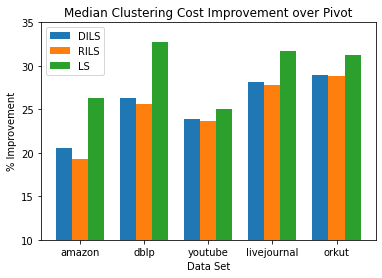

In [5]:
# SCORE IMPROVEMENT

titles = ["amazon", "dblp", "youtube", "livejournal", "orkut"]


# MEDIAN

pivot_avg_scores = [np.median(amazon_scores[0]), np.median(dblp_scores[0]), np.median(youtube_scores[0]), np.median(lj_scores[0]), np.median(orkut_scores[0])]
hybrid_avg_scores = [np.median(amazon_scores[1]), np.median(dblp_scores[1]), np.median(youtube_scores[1]), np.median(lj_scores[1]), np.median(orkut_scores[1])]
hybrid2_avg_scores = [np.median(amazon_scores[2]), np.median(dblp_scores[2]), np.median(youtube_scores[2]), np.median(lj_scores[2]), np.median(orkut_scores[2])]
local_avg_scores = [np.median(amazon_scores[3]), np.median(dblp_scores[3]), np.median(youtube_scores[3]), np.median(lj_scores[3]), np.median(orkut_scores[3])]

hybrid_score_improvement = [100 * (pivot_avg_scores[i] - hybrid_avg_scores[i]) / pivot_avg_scores[i] for i in range(len(titles))]
hybrid2_score_improvement = [100 * (pivot_avg_scores[i] - hybrid2_avg_scores[i]) / pivot_avg_scores[i] for i in range(len(titles))]
local_score_improvement = [100 * (pivot_avg_scores[i] - local_avg_scores[i]) / pivot_avg_scores[i] for i in range(len(titles))]

print(hybrid_score_improvement)

ind = np.arange(5) 

plt.bar(ind, hybrid_score_improvement, width = 0.25, label="DILS")
plt.bar(ind+0.25, hybrid2_score_improvement, width = 0.25, label="RILS")
plt.bar(ind+0.5, local_score_improvement, width = 0.25, label="LS")

plt.xlabel("Data Set")
plt.ylabel("% Improvement")
plt.title("Median Clustering Cost Improvement over Pivot")
plt.xticks(ind+0.25,titles)
plt.ylim(10,35)
plt.legend()
plt.show()


0.095 0.1265 0.12 0.45699999999999996
0.0875 0.122 0.118 0.431
0.6335 0.42700000000000005 0.4245 1.8385
2.2165 2.8659999999999997 2.782 18.146
1.552 5.0065 4.916 57.719


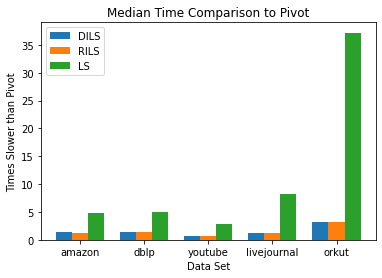

In [6]:
# Running times
# MEDIAN

pivot_avg_times = [np.median(amazon_times[0]), np.median(dblp_times[0]), np.median(youtube_times[0]), np.median(lj_times[0]), np.median(orkut_times[0])]
hybrid_avg_times = [np.median(amazon_times[1]), np.median(dblp_times[1]), np.median(youtube_times[1]), np.median(lj_times[1]), np.median(orkut_times[1])]
hybrid2_avg_times = [np.median(amazon_times[2]), np.median(dblp_times[2]), np.median(youtube_times[2]), np.median(lj_times[2]), np.median(orkut_times[2])]
local_avg_times = [np.median(amazon_times[3]), np.median(dblp_times[3]), np.median(youtube_times[3]), np.median(lj_times[3]), np.median(orkut_times[3])]

hybrid_time_compare = [hybrid_avg_times[i] / pivot_avg_times[i] for i in range(len(titles))]
hybrid2_time_compare = [hybrid2_avg_times[i] / pivot_avg_times[i] for i in range(len(titles))]
local_time_compare = [local_avg_times[i] / pivot_avg_times[i] for i in range(len(titles))]

for i in range(len(titles)):
    print(pivot_avg_times[i], hybrid_avg_times[i], hybrid2_avg_times[i], local_avg_times[i])

plt.bar(ind, hybrid_time_compare, width = 0.25, label="DILS")
plt.bar(ind+0.25, hybrid2_time_compare, width = 0.25, label="RILS")
plt.bar(ind+0.5, local_time_compare, width = 0.25, label="LS")

plt.xlabel("Data Set")
plt.ylabel("Times Slower than Pivot")
plt.title("Median Time Comparison to Pivot")
plt.xticks(ind+0.25,titles)
plt.legend()
plt.show()

### Consensus: Mushrooms

Pivot multiple increase of cost for smallest sample: 1.1080174491036805
LS relative decrease from ILS at R = 22: 6.50066037196489


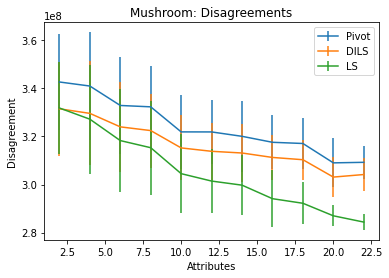

In [8]:
"""
Score Plots (Disagreement to Input Clusterings): 
"""

attributes = [x for x in range(2, 23, 2)]

scores1 = [[341688724,335623464,339145568,337465208,319234688,339008992,367069056,367101552,361684016,351839344,323317896,336934432,321756608,370230720,330280000,323506080,327684464,375248848,362526576,329684064,319035488,337669680,366522432,375925360,333527216,329489824,368846064,334688008,311709308,375925360,348773728,330917376,323440912,336131008,375333504,375925360,337295808,361916256,348160544,318993072,332995388,327124608,311663460,330280000,308379568,333199916,337419940,372604336,375925360,330857312],
[366522432,331879924,375333504,374643556,368408524,335712180,365871588,355189648,346977360,308148620,299774000,331785088,327245968,316584848,353704832,367101552,356789780,347565464,331086076,333682460,301441600,326218236,365871588,328766604,358889748,353263840,309736568,300872528,375925360,361094016,321042720,368414224,338649460,332204480,296442656,359932064,366522432,343802964,320112400,327800872,348250976,334511088,324439904,375333504,324746080,326241480,366522432,346294344,332407520,317796096],
[327690144,348298648,317619968,312546684,303505912,322750888,332180940,346985104,316488544,324331816,375625264,302605424,306594160,323895136,292658896,319707792,331285352,321270436,330671312,305302160,363766520,346097948,337195604,368859124,328911280,340019600,339654876,355033816,312354582,314823416,359488896,314498176,327768896,343959280,327945264,341915804,311278756,366918476,330103152,359486820,371278604,338452282,316164192,327020816,343310640,371785152,307601952,344586240,341766880,329453552],
[336523696,319745472,321528124,341344676,312327300,348978740,342234598,306017614,320386436,322550936,341279208,311691168,317770644,325233888,318315400,338036772,310818706,324138020,323741920,357530188,325709408,361460686,342624240,336731872,330267624,337702500,341059152,327501178,313735600,353123532,336651874,317582624,372494480,351140046,370091056,331549856,346704656,333913936,325163280,367756224,304489036,355948470,335827968,325991072,306431778,305694672,325986680,313998598,336828162,340683200],
[324410394,334596984,318587444,322546252,355052172,303906550,335767088,340062716,346075094,322048580,320637688,333107172,342503648,314083104,306037318,323125016,296953120,329683892,305551380,317227030,340096458,305080692,319833370,323816576,298250812,306469872,315019868,319891624,298117896,334011908,318382616,335016156,319320720,313618144,343448724,327852160,313251786,312725264,317257568,301056488,317496408,333177672,307723092,318671112,303755412,310438240,323795660,310792558,371955568,341940204],
[314228216,309729152,333929792,314533572,345615496,314047878,326213010,318259576,342085424,306913166,306918452,311078752,325694608,318942548,329274814,305972598,344035536,323134400,314080404,308612992,321794816,332431564,325693806,347426036,330424424,321623230,311208088,315851592,314872660,307264646,321201720,315848970,315157018,309013836,329063416,317786552,334138504,338615072,309568404,304034560,317427896,302203746,337918088,351749156,301479118,313077600,320258064,322846020,358081986,331969420],
[318407652,340206344,304747816,345270174,309198424,350193628,301527448,340143584,301379930,319503748,311328082,328795466,309364932,326197940,304126312,340029732,342398912,307683216,306411300,323262480,331920406,293504728,335257566,312877946,309850990,297554764,324323344,306031798,306830308,323344196,320058540,350932384,315804180,324867152,312282888,312240930,314325618,341251392,327608370,301968784,303680602,317633278,331568174,308895068,336353804,338022398,330563900,307715612,324126874,310490350],
[306889880,319532350,327032402,302595310,325458026,329025964,315395558,325756262,318391926,298901588,323587022,300669008,305632030,305081184,300457318,317870244,331408502,321672836,322195726,321023516,309298836,309010558,333208252,309632292,308552118,302288986,325785570,329249302,323079320,337814048,295999144,309690292,323520016,313355236,307411480,326807316,342198260,326486868,318274812,331572456,307795518,313424018,314355516,303345726,342259380,323162566,310540854,317354712,325526680,318320170],
[315245642,326659554,303630096,301390624,306103080,323422040,331165800,314320630,348479320,296700146,311745976,322439154,321422570,299709006,319205932,318332158,307437496,306217208,307040302,299957614,334721644,301904158,309321206,325877754,306749322,317536144,322287532,321042172,324501224,317841974,310648138,317346794,317624110,311338520,323687590,324864356,310606712,314665158,333192616,311426686,326460816,325121816,320477016,322892484,310510644,321589958,322812184,313447894,313653290,338388152],
[297716590,301941616,304498886,298174578,321065894,302488780,318003674,291335090,317430496,311206566,322203764,323898682,294946492,301459288,299890614,306595776,289881200,330493560,312814752,313089956,321470010,305808668,311533184,333026474,318677794,303493146,298968444,302056538,302639396,302507498,322119180,311009236,320393644,303991212,301244830,303629162,323177044,299221784,306476732,310470926,307104440,324787252,301474790,316993312,308238992,313951802,293417292,316434886,298344168,308639018],
[314504402,308473402,304944490,308106476,304565464,314180656,312285724,311753136,310583766,303277220,319971336,308846848,309519542,317192194,315298902,318564810,298076484,296371054,318625232,301290080,308052266,310185562,306276152,302114064,310976348,303913080,305430960,302774372,322709464,315561724,303728646,293279536,301908598,315104490,302562306,320596428,312647432,314098006,299546772,306968250,314016676,315578732,299279298,307390588,305102534,317258434,314036748,311172106,301221784,321662900]]

### HYBRID ###

h_scores1 = [[337774172,317241776,305772256,319900088,309429432,322281840,359251584,366445264,343290912,314692528,317242520,333411672,321756608,343399424,330280000,312540624,322287200,352883168,349076080,318131904,307122888,329152016,366522432,363889552,316193560,323370572,312438272,329148576,309250820,375925360,311453824,323694444,320649152,331925168,366522432,366535168,322582912,347947344,331883736,316573392,326055740,318976992,309268644,330280000,307422224,328731532,330837852,346827696,375925360,329973312],
[365267220,323935734,337148502,350772428,365375688,324807398,365293140,339792544,316735188,305605358,294432610,326621228,311952382,310643312,321928000,366522432,340048204,321441190,321126358,326771200,301441600,321894702,365871588,327132436,319419004,341756112,309289008,298898982,365871588,324197346,309968608,365966172,326307292,319218656,290612340,324001064,366522432,326499966,314869594,315592062,330256662,306613718,314358814,372492960,317709274,322459178,365267220,332318068,324463360,316257312],
[326941216,326088506,316130392,310214844,302044406,315913764,316867264,341564744,310838774,322691360,373038008,301524880,303232496,314215942,292500464,313405852,327343904,315000726,328801568,302674802,354369284,324396110,329949580,366406350,310883216,328146122,311195012,337907210,307088772,310885132,308723030,311146128,320944890,312542812,327945264,338201612,308179704,353733586,320545760,351000756,365275724,313253468,312622852,316685410,327409088,367892352,304627848,333008096,334419364,325318404],
[327532228,317685584,317197144,336328812,310972100,321382284,316186706,303024750,316032608,309403526,320020214,308189814,310528304,313799858,314672696,331789090,309393358,320612816,310660928,352564524,325079828,360579868,328504574,321550744,324778890,332191194,338060452,311610138,311554572,331901530,329439356,306795840,363755984,328770824,363697760,312284928,337299060,316903110,320232386,353334024,301886614,322566802,318978450,317586512,299243136,295671150,319341282,313123048,321699936,328866850],
[313775330,332996270,317917284,321158604,350458660,301625514,328807788,311332384,335524778,318266320,312610762,318587450,329800376,305159184,305455766,311720376,295759568,326323332,301150302,315047028,333290676,301559910,317829878,309018638,293922350,300396942,312224846,317725286,296958680,324778224,309946656,313587106,317187300,310861950,333209510,322522334,310942288,303458288,312873296,297035054,311874036,328880184,301069366,317285956,297590414,307249954,320921674,308720424,361491988,311889726],
[309083174,304362952,321382714,308231218,331838648,303607572,318295978,316684678,339626198,305935044,302303864,309633044,320498936,310464516,324160208,299987288,314990592,316022358,312816898,307819090,310134382,314552388,320516714,339191202,317264012,318251994,304894326,313045010,310894882,305292678,317801790,300880608,304201370,304378182,312689880,298669448,327627378,320161108,300373754,302197884,300615518,296878712,324060386,347593762,299251726,306507208,313252658,316171108,346459264,320740906],
[311575998,334441602,303631360,327192448,304390874,342578680,297571450,327350540,300058282,314272858,304293034,312548838,305471918,319470458,301447544,300568872,337099548,305882550,299473602,321560122,330197280,291574380,319502784,311492192,305868866,297007626,319539384,302297102,302396440,313330774,309532604,330392072,312458854,311646782,309754106,308234954,311738834,327789960,324683420,297338368,299221184,314067762,312633596,308345000,330789818,334991696,320923196,302390050,317827438,307168368],
[304171296,311049378,305514314,300622750,317243778,325735446,309517452,313785652,309126976,298251266,321059548,298724508,298056426,300689878,296226170,313022580,323632260,314686178,312470244,319146060,306859030,303835730,315655168,306781380,307115006,296102480,311285654,323034008,311657006,310324590,293757832,308619188,318429618,310606448,305090462,317253496,339533490,322922548,306079660,324748632,306374206,308848332,312451334,300532038,333613792,314741658,309106206,312792400,321836740,307921402],
[308861296,322118572,302911714,295435456,300828584,321909120,328357772,302268470,318098566,295299608,311131662,317120116,318386452,292552260,315514842,305618302,301333414,303710354,301783964,298490720,325849498,298781608,304855660,321714928,304953942,305645868,318248228,316051250,310375102,314134700,304094922,313506378,313879276,308272966,318615358,309549674,296982586,311664124,312098156,307719122,311765400,321922352,310555492,317677206,305655416,317728486,314548578,306431412,312378908,318354158],
[297372016,290857902,299132576,288646546,299126428,300561588,307449192,290967134,306459362,309592208,320832790,309334592,291524724,296271594,296150014,303991100,288490250,326139408,309551928,310719390,313870908,302942232,308675068,301877428,313688368,300664766,298274016,300361068,300500976,299938924,301173212,307418790,315565128,299987664,298341048,299967162,316667454,295969982,303638710,301599072,305901284,316971408,296423836,311941814,303596722,304929030,288009080,304448436,291116636,305880128],
[309216874,304100542,296242918,303681560,302315890,312206262,310199448,307516264,308696536,301327462,315739180,303010326,305611950,312067304,307483124,314570978,294095156,293992244,308317746,295944096,298136122,303930584,302270638,295662730,309316452,296293770,300231306,294404850,319890074,312250158,295701672,289769392,298896950,310549702,296889236,298204670,307783776,306851294,296686180,304371216,307849750,312265116,295800514,301531670,303032868,313045934,308057156,305961504,299239304,315894140]]

h_scores2 = [[337774172,317241776,305772256,319900088,309429432,322281840,359251584,366445264,343290912,314692528,317242520,333411672,321756608,343399424,330280000,312540624,322287200,352883168,349076080,318131904,307122888,329152016,366522432,363889552,316193560,323370572,312438272,329148576,309250820,375925360,311453824,323694444,320649152,331925168,366522432,366535168,322582912,347947344,331883736,316573392,326055740,318976992,309268644,330280000,307422224,328731532,330837852,346827696,375925360,329973312],
[365267220,324362674,339952086,350772428,365375688,324804212,365293140,339792544,316028044,305606654,294290528,326371572,311889412,310643312,322152146,366522432,340325416,320702070,321128568,327322758,301441600,321358508,365871588,327128200,319890750,341756112,309287672,298945460,365871588,327805816,309968608,365966172,326373648,319218656,291098060,323982558,366522432,326263808,315419648,315550632,330112854,306780130,314319874,372492960,316474574,321908850,365267220,332960228,324463360,316257312],
[326941216,326029806,316334560,310450674,302047442,315990274,316845904,341439248,310768102,322691360,373038008,301524880,303232496,314825146,292500464,313362320,327339912,314942586,328801568,302670274,354384488,325596290,329949580,366406350,311647692,328360216,311107854,337770606,307076854,310895234,309692736,311146128,320530110,312433544,327945264,338201612,308125330,353732728,320366454,350981532,365275724,313253440,312812718,316726646,327409088,367892352,304629944,333008096,334457086,325079580],
[327170874,317675504,317186056,336292044,310860680,320680898,313926354,303102690,315866202,309549090,320262328,308130808,310313740,314040154,314413374,331687502,309391512,320597858,310138888,352564524,324930404,360579868,328453476,321627268,324781994,332205960,338055496,311672484,311715852,331519102,328783388,306916520,363755984,328720388,363697760,312501492,336921132,317273160,320329718,353079634,302024638,322528226,318881062,317173574,299257490,295658830,319458364,313127124,323058226,328987946],
[313724678,332996052,317866592,321155324,350458660,301594324,328929000,311530292,335269582,318084950,312557510,318635244,329958296,305051646,305585840,311599666,295699138,326173668,301479338,315105418,333310814,301572230,318034938,309018340,294011034,300367652,312166312,317754774,296934546,324780830,309967756,313565626,317187300,310852162,333093830,322543716,310994212,303435616,312968954,297015038,311586590,328880184,301000866,317302120,297666612,307149510,320994214,308858056,361491988,312924556],
[309355046,304490070,321192788,307955114,331685164,303443130,317695370,316661492,339668938,306099262,302306444,309622508,320500248,310498138,324138472,299947294,316262048,315963390,312757512,307803128,310222314,314533368,320441864,339090418,317797666,318249718,304893400,313102872,310739968,305401240,317862566,300792778,304419572,303502070,312567902,297971856,327718570,319635018,300440116,302370166,300440580,296923088,323985876,347598054,299271496,306492874,313194460,315990312,346423854,320621100],
[311633390,334701484,303703040,327102902,304258084,342340670,297696390,329082068,300060064,314116462,303889860,312454086,305469098,319425890,301412484,300519744,337120924,305864702,299466126,321562688,330239004,291542550,318030322,311351814,305898806,296999062,319600364,302295676,302392184,313334756,309668136,330189974,312394620,311965392,309736312,308223312,311781836,327765242,324642544,297280926,299220512,314058660,312596974,308345108,330780248,334974684,321139714,302027390,317821066,307137320],
[304193606,311881162,305363206,300629346,317167026,325721870,309996692,314551178,309152176,298252968,321066468,298724364,298083926,300702056,296173500,312979392,323651142,314679064,312573038,319137188,306775498,303847630,315548614,306779722,307111818,296189190,311358500,323062554,311699362,310789584,293760352,308634228,318638812,310562288,305026364,317302680,339535918,322817192,306081540,324822478,306399402,308730630,312419954,300627868,333557416,314707400,309120086,312838528,321764596,307848356],
[308770306,321978860,302932660,295421010,300848406,321913362,328382950,301688714,318091604,295309766,311120618,317040640,318370256,292643626,315618204,305624324,301365878,303684882,301743758,298669486,325822894,298893572,304847418,321217416,305306690,305584582,318292876,315961042,310330094,314224636,304419036,313539024,314024822,308398870,318590244,310174426,296996896,311353490,312364198,307732578,311884518,321821238,310402268,317688606,305728310,317735058,314490132,306145496,312279304,318298718],
[297372184,290969338,299116258,288612682,298730666,300511288,307311836,290950200,306258788,309586334,320866466,309690878,291591070,296316702,296160934,303992984,288493378,326174084,309604310,310727182,314225696,302895512,308706760,302728852,313946012,300649850,298297728,300396018,300509206,299929776,301202754,307359134,315603398,299692794,298365870,299963926,316866378,295921184,303677924,301622888,305896898,316946232,296393350,312062324,303406054,304855214,287987052,304510432,291148770,305876844],
[309128572,304041140,296249362,303700426,302304056,312196592,310201818,307364012,308690746,301216478,315580016,302988518,305580922,312127610,307489798,314531590,294098480,293999162,308265794,295982200,298051798,304198664,302217550,295668638,309341170,296326294,300199528,294443580,319787268,312220022,295701188,289787056,298860344,310509654,296907644,298735760,307950316,306989108,296702280,304345842,307922070,312230718,295820638,301467758,303042280,313039786,308170550,306125386,299207326,316103444]]

l_scores1 = [[338042780,316321072,320617264,324062512,311217568,319655280,359251584,366445264,341239520,316382128,323317896,334731128,321756608,343222080,330280000,312432400,323416160,352634048,347061936,319454272,305269928,329678784,366522432,363889552,315124388,323178092,315204512,329083704,309347876,375925360,300134176,323781932,320649152,328165040,366522432,366535168,322759792,345995920,330394824,316729808,329378740,318287216,309347876,330280000,307424176,333199916,333737804,347061936,375925360,329989664],
[365293140,315098714,338496618,350798348,365267220,315856686,365871588,315750364,309765020,305925494,291221904,323170362,309386184,308868138,317693682,367101552,339877616,318369090,316216050,323523004,301441600,309923286,365871588,326450074,302794472,339919402,309736568,294345008,365871588,324006470,303373216,365871588,324653524,316529888,296442656,326458586,366522432,321627878,314096174,315829902,329572614,328555608,313116222,372492960,311711712,316162106,365267220,328170728,324463360,313413908],
[326683296,314262726,311552812,304009380,301170558,312025100,294392012,338306144,304540270,323097082,373037712,301361700,302602454,309505408,292658896,308488858,327678112,299381940,330671312,300827666,354428500,312033386,314007600,366304314,300403694,322928718,310574292,329785160,291338696,302427860,310018944,311907558,311921550,296666932,327945264,339344694,294487112,355586482,306216314,350742840,365024910,295597904,300310790,308556144,321989730,367615872,300877434,333681020,333356250,301092046],
[318500198,311651556,300063612,314714580,295828134,314209480,311917898,292960036,309543136,284744696,310137322,304091066,307131264,302591336,303784376,338036772,297092604,307038762,306913238,355986434,306273274,357883860,326027982,314112776,319403060,327167398,341059152,299875262,297390488,329556674,324503178,292066212,364286448,328766252,369154784,304448780,334143146,304557974,314122962,355458098,293539076,316925976,307469458,309974714,291280650,295404162,319682316,302401038,311379018,320058150],
[309795906,332145772,308507280,314475514,352510222,294806810,317921576,290956764,333640048,298905166,305822950,292275912,300202372,294684090,294083058,308657144,288202944,318928654,288258154,305055832,326994226,292301844,294977508,290956312,286591482,290953718,302237802,297705348,292207236,322594878,302810084,306419094,312859304,304275198,318515722,318312348,299200196,288036226,293524260,293714422,294187796,312237728,286936198,296612904,284665358,290502978,320123136,287995708,361487700,306116384],
[292649322,293161210,310420202,298887138,312428168,292164486,302874008,301614278,313367058,291711908,294929502,300139954,309058368,291222946,310410372,285117766,297737636,304157944,303449860,291856368,292871340,294394846,301181364,331571766,308067978,307039010,287287266,299967338,306829424,295582880,299087122,289266362,289729476,292901748,305314522,287012420,305639738,308950900,287170924,292128510,284885090,290862712,314280908,351258736,292774802,299782440,299823408,300956634,347985864,309868164],
[295146588,318080774,291665064,318781086,290782616,328569088,283995696,315846968,287910010,292756116,287760698,299741320,292860044,304497080,288208552,286325130,320159710,293401764,289550726,302258916,326172480,288652856,295549118,292954764,296362734,293212746,303699980,294114962,288529128,306010512,306505696,303898770,295292550,291023226,294881340,289016924,295999400,326921644,318628150,288094656,284434948,286959328,296387556,300827084,314945074,320177974,303988180,285652394,313319722,296170710],
[288481736,288123998,287780342,289579606,284210536,307614788,291124664,289351708,291406292,291364898,305066954,283612862,289430470,287048158,283784156,288745018,309539456,304127318,309297144,295914962,284116124,291091562,291078454,290156656,290861624,289471170,286210006,302717390,302170304,299143308,285080474,285230790,284946144,283963762,289983256,302859490,342198260,292681280,287831326,306876984,284959402,287741024,287882274,290415608,338833476,289361000,289589998,302741310,290984118,288620546],
[296323810,298106490,289539714,284973902,286563784,300308166,317834400,290610892,305997178,288656700,298091812,299523956,284240776,283003976,287913790,287435060,285227026,286565050,283520090,283779774,300166484,285156044,286877998,300274340,289642946,293788932,306850122,302104202,285607372,289057380,288279614,284421828,296431400,287604714,315506658,284875300,284084240,290309646,287666564,286138422,284321386,301077636,300128650,285809182,284034354,295939916,285545406,291611488,286480864,312189816],
[287789396,284288354,286091744,282489352,284338450,282731126,285814590,288202006,288071286,296741106,299183404,284722260,282666778,286957518,283554590,286772520,282549426,288672808,282602384,287871390,297631148,283088282,287613676,285792640,297366682,284747952,284244416,283549082,283310330,282825172,283452390,289127888,293165784,283148202,289806732,287315622,288069016,287350630,285562794,282454016,285614882,297832518,286240722,290496402,286821474,290242328,283035580,286762898,282565850,288256298],
[289537600,283246196,283149884,282779202,286638316,286049792,283960728,283032500,300886674,282431184,283998838,282403632,286492900,283386390,282441220,286484872,282395240,282424316,282905718,282885792,282442848,283000434,282419772,282391754,288690598,282395864,283161314,282993974,291762426,289234246,283194902,282755448,282414716,282573438,283210134,282572210,282458248,283714622,284444790,283110014,287009832,285516886,282749040,282410496,282419466,286241302,282988686,282781576,282481936,288130846]]

scores = [scores1[i] for i in range(len(attributes))]
plot_scores = [np.mean(s) for s in scores]
err_scores = [np.std(s) for s in scores]

print("Pivot multiple increase of cost for smallest sample:", plot_scores[0] / plot_scores[-1])

h_scores = [h_scores1[i] for i in range(len(attributes))]
h_plot_scores = [np.mean(s) for s in h_scores]
h_err_scores = [np.std(s) for s in h_scores]

h1_scores = [h_scores2[i] for i in range(len(attributes))]
h1_plot_scores = [np.mean(s) for s in h1_scores]
h1_err_scores = [np.std(s) for s in h1_scores]

l_scores = [l_scores1[i] for i in range(len(attributes))]
l_plot_scores = [np.mean(s) for s in l_scores]
l_err_scores = [np.std(s) for s in l_scores]

print("LS relative decrease from ILS at R = 22:", 100 * (h1_plot_scores[-1] - l_plot_scores[-1] ) / h1_plot_scores[-1])


plt.title("Mushroom: Disagreements")
plt.xlabel("Attributes")
plt.ylabel("Disagreement")
plt.errorbar(attributes, plot_scores, err_scores, label="Pivot")
# plt.errorbar(attributes, h_plot_scores, h_err_scores, label="RILS")
plt.errorbar(attributes, h1_plot_scores, h1_err_scores, label="DILS")
plt.errorbar(attributes, l_plot_scores, l_err_scores, label="LS")
plt.legend()
plt.show()



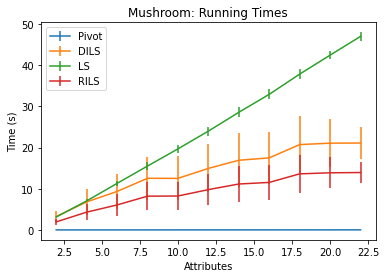

In [9]:
"""
Time Plots
"""

attributes = [x for x in range(2, 23, 2)]

scores1 = [[0.013,0.006,0.005,0.002,0.004,0.007,0.001,0.002,0.002,0.002,0.002,0.002,0.002,0.001,0.001,0.001,0.001,0.001,0.002,0.001,0.002,0.001,0.001,0.001,0.001,0.002,0.001,0.002,0.001,0.0,0.002,0.001,0.001,0.001,0.002,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.002,0.001,0.001,0.001,0.001,0.001,0.001,0.001],
[0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.003,0.001,0.003,0.003,0.004,0.003,0.002,0.002,0.002,0.002,0.002,0.003,0.002,0.003,0.004,0.002,0.002,0.002,0.002,0.003,0.002,0.001,0.002,0.003,0.001,0.002,0.002,0.002,0.002,0.003,0.001,0.003,0.003,0.003,0.004,0.002,0.002,0.003,0.003,0.002,0.002,0.002,0.003],
[0.003,0.003,0.005,0.005,0.005,0.004,0.004,0.004,0.004,0.003,0.003,0.003,0.004,0.003,0.004,0.004,0.003,0.005,0.004,0.004,0.002,0.003,0.003,0.002,0.003,0.004,0.004,0.003,0.004,0.004,0.003,0.003,0.004,0.003,0.003,0.003,0.002,0.003,0.005,0.003,0.002,0.003,0.005,0.004,0.004,0.003,0.004,0.003,0.003,0.003],
[0.004,0.004,0.006,0.004,0.005,0.003,0.005,0.007,0.006,0.005,0.006,0.006,0.004,0.004,0.005,0.005,0.005,0.003,0.004,0.004,0.005,0.003,0.005,0.006,0.004,0.004,0.003,0.005,0.006,0.004,0.004,0.006,0.004,0.004,0.004,0.005,0.004,0.004,0.006,0.003,0.004,0.005,0.004,0.005,0.006,0.004,0.004,0.006,0.005,0.005],
[0.007,0.006,0.006,0.006,0.006,0.008,0.006,0.005,0.004,0.008,0.006,0.005,0.006,0.007,0.01,0.007,0.007,0.005,0.007,0.006,0.006,0.007,0.007,0.005,0.006,0.006,0.006,0.007,0.006,0.006,0.006,0.005,0.006,0.006,0.006,0.005,0.006,0.006,0.007,0.006,0.007,0.005,0.005,0.006,0.007,0.006,0.005,0.006,0.005,0.005],
[0.009,0.006,0.008,0.008,0.006,0.007,0.008,0.01,0.008,0.01,0.007,0.006,0.007,0.006,0.007,0.006,0.004,0.008,0.007,0.011,0.008,0.008,0.009,0.006,0.004,0.007,0.007,0.007,0.007,0.008,0.007,0.007,0.008,0.01,0.007,0.007,0.007,0.006,0.007,0.007,0.007,0.008,0.006,0.006,0.008,0.007,0.008,0.009,0.006,0.006],
[0.008,0.007,0.009,0.008,0.008,0.007,0.008,0.008,0.009,0.008,0.009,0.01,0.009,0.007,0.008,0.006,0.008,0.009,0.006,0.008,0.009,0.01,0.008,0.009,0.008,0.011,0.009,0.008,0.008,0.008,0.007,0.006,0.01,0.008,0.01,0.009,0.01,0.009,0.01,0.007,0.008,0.009,0.009,0.008,0.006,0.007,0.009,0.009,0.006,0.009],
[0.01,0.009,0.009,0.011,0.012,0.01,0.009,0.009,0.01,0.013,0.009,0.01,0.009,0.009,0.012,0.011,0.009,0.01,0.009,0.012,0.01,0.01,0.009,0.009,0.013,0.008,0.013,0.012,0.009,0.007,0.009,0.01,0.011,0.009,0.011,0.009,0.008,0.012,0.008,0.008,0.011,0.01,0.01,0.008,0.008,0.014,0.013,0.01,0.012,0.011],
[0.012,0.011,0.013,0.011,0.015,0.013,0.012,0.009,0.01,0.012,0.014,0.011,0.012,0.011,0.011,0.011,0.012,0.01,0.01,0.013,0.01,0.012,0.009,0.014,0.014,0.01,0.009,0.009,0.009,0.011,0.012,0.012,0.012,0.012,0.008,0.013,0.01,0.012,0.009,0.01,0.009,0.01,0.01,0.009,0.012,0.015,0.011,0.012,0.01,0.008],
[0.017,0.011,0.011,0.01,0.012,0.014,0.012,0.013,0.01,0.012,0.018,0.012,0.011,0.016,0.014,0.011,0.014,0.014,0.016,0.014,0.01,0.011,0.009,0.009,0.011,0.014,0.014,0.016,0.013,0.015,0.014,0.011,0.011,0.012,0.013,0.01,0.011,0.011,0.014,0.012,0.014,0.012,0.013,0.011,0.011,0.013,0.011,0.013,0.012,0.016],
[0.014,0.013,0.011,0.014,0.013,0.018,0.012,0.014,0.013,0.017,0.013,0.014,0.015,0.014,0.013,0.013,0.014,0.013,0.012,0.014,0.015,0.011,0.016,0.012,0.017,0.014,0.011,0.012,0.015,0.018,0.014,0.014,0.012,0.016,0.017,0.012,0.015,0.015,0.014,0.016,0.012,0.014,0.013,0.013,0.014,0.013,0.015,0.015,0.017,0.014]]

### HYBRID ###

h_scores1 = [[1.495,1.997,2.039,1.832,1.105,1.328,3.01,2.965,2.72,2.375,1.457,1.022,1.479,3.02,1.683,1.694,1.321,3.215,2.845,1.138,1.113,1.375,3.077,3.165,1.627,0.997,2.806,0.824,0.996,3.247,1.845,1.776,1.745,1.559,3.373,3.421,1.898,2.942,1.294,1.599,1.089,2.09,0.979,1.654,0.923,0.981,1.134,2.919,3.278,1.699],
[7.073,3.755,7.762,7.083,6.958,4.39,6.896,4.505,3.835,1.158,1.976,2.616,3.715,3.891,4.534,6.702,5.841,4.116,2.918,2.531,1.885,1.191,6.892,2.539,5.545,6.189,1.938,2.418,6.796,5.849,2.546,6.633,4.448,4.586,2.525,5.994,7.237,4.923,1.848,2.086,4.354,3.885,3.339,7.359,2.106,1.651,7.453,2.739,4.011,2.476],
[6.303,9.01,3.95,1.603,3.238,3.987,5.128,5.414,3.659,6.218,12.12,4.766,4.031,6.06,3.804,5.069,5.835,2.839,4.926,2.788,9.567,5.628,6.26,11.26,4.345,7.152,7.491,8.703,2.966,2.422,9.936,6.097,4.286,7.186,8.077,6.29,4.111,10.586,4.177,10.348,11.501,5.075,3.529,3.806,6.223,11.95,3.5,8.435,7.65,3.807],
[10.556,7.64,4.42,9.78,3.576,11.83,10.641,2.932,6.141,5.815,10.624,8.138,4.613,8.548,5.302,9.498,3.977,5.892,9.026,14.048,5.921,15.66,7.194,7.419,9.582,7.17,12.451,6.328,4.519,11.126,6.141,5.08,16.618,13.618,15.075,8.807,8.67,6.948,5.073,14.41,6.465,13.308,7.928,5.472,4.866,6.215,8.101,3.379,6.313,7.186],
[8.338,10.546,9.921,7.166,18.175,4.527,9.497,12.068,12.963,4.339,9.586,8.471,10.742,7.992,2.62,9.571,5.77,8.701,6.295,5.715,8.246,5.766,3.969,8.362,7.943,6.49,6.577,4.173,4.805,9.583,6.681,13.262,10.958,7.457,9.464,9.009,5.655,6.163,4.197,6.242,6.322,12.385,6.766,8.17,5.875,4.867,10.956,4.94,21.049,12.364],
[5.006,9.603,15.055,10.197,14.675,7.746,7.179,4.736,11.239,4.121,7.965,10.773,9.034,9.746,9.571,7.762,15.392,8.821,6.448,4.482,8.899,12.322,6.484,14.365,15.91,7.026,8.183,6.64,12.282,4.761,5.362,11.035,8.16,6.676,12.18,10.244,11.194,10.968,9.063,6.133,9.587,10.13,18.491,16.517,7.121,12.065,6.902,6.491,22.307,12.442],
[11.664,19.397,8.298,15.128,8.114,17.103,8.771,16.635,8.562,8.248,7.693,15.257,9.966,11.527,7.917,18.856,20.966,5.78,11.07,9.867,11.734,8.017,14.2,6.433,8.298,6.019,14.022,9.287,7.989,13.911,18.264,22.233,6.78,11.982,5.022,7.779,6.858,17.158,10.514,9.993,8.13,4.819,11.473,7.831,11.768,12.864,11.548,7.333,15.227,9.369],
[10.109,14.971,20.069,7.357,7.506,11.076,9.318,12.972,12.364,5.636,11.21,8.945,12.246,12.63,12.05,8.463,14.306,16.155,14.819,6.186,8.306,7.27,15.706,10.44,6.485,10.358,15.035,8.607,15.229,22.059,10.681,8.86,9.368,11.695,7.067,15.486,23.133,8.939,12.171,14.064,7.325,10.214,8.043,13.311,22.967,10.05,5.832,11.847,8.042,9.988],
[16.256,13.454,7.58,14.033,9.381,8.024,12.111,19.169,27.058,12.112,7.554,9.7,7.697,14.524,15.581,18.754,12.165,15.585,12.961,11.228,15.162,9.062,16.066,11.445,8.383,15.548,17.13,13.988,11.867,17.016,11.365,9.522,12.263,9.275,21.793,15.988,13.939,8.069,20.113,12.056,15.782,12.965,21.069,14.75,10.382,9.613,12.542,11.008,9.435,28.563],
[7.625,18.414,16.648,15.745,19.212,10.021,15.553,10.56,23.751,10.626,13.265,21.437,14.377,12.808,12.568,16.004,11.052,14.056,10.262,7.565,19.703,10.107,16.595,23.715,11.855,12.209,9.516,8.376,11.816,12.283,19.262,13.701,11.945,11.013,9.737,17.369,13.624,17.587,9.917,14.93,11.407,15.422,13.294,15.487,13.484,13.176,16.04,15.514,14.237,8.898],
[12.261,11.113,18.132,16.1,13.946,11.065,12.026,12.565,13.849,11.883,12.184,14.754,15.187,11.679,16.653,13.597,13.211,12.153,17.264,13.655,14.863,15.586,14.271,13.374,8.929,15.744,15.029,17.778,9.556,9.991,15.059,16.066,12.248,11.103,16.521,22.559,13.535,17.5,15.042,10.958,16.146,13.47,16.389,14.762,12.73,13.459,11.789,12.25,11.022,16.042]]


h_scores2 =[[2.303,3.304,3.571,3.136,1.81,2.153,5.051,5.05,4.642,4.016,2.395,1.614,2.363,5.116,2.706,2.817,2.215,5.468,4.709,1.848,1.809,2.206,5.187,5.368,2.611,1.608,4.589,1.285,1.574,5.518,3.05,2.934,2.865,2.569,5.797,5.846,3.142,4.927,2.079,2.64,1.781,3.564,1.564,2.719,1.491,1.583,1.805,4.962,5.531,2.834],
[11.127,5.8,12.253,11.408,10.832,6.952,10.626,7.122,5.98,1.8,3.111,4.027,5.677,6.113,7.159,10.671,9.273,6.562,4.51,3.963,2.952,1.853,11.229,3.988,8.718,9.578,3.085,3.811,10.845,9.388,4.031,10.594,7.011,7.2,3.946,9.316,11.546,7.752,2.87,3.262,6.852,6.171,5.305,11.764,3.324,2.572,11.748,4.269,6.234,3.855],
[9.774,13.801,6.01,2.423,5.112,6.009,7.806,8.551,5.548,9.55,18.72,7.441,6.16,9.257,5.798,7.792,9.07,4.322,7.551,4.227,14.901,8.838,9.603,17.406,6.533,11.082,11.734,13.574,4.43,3.712,14.954,9.454,6.59,11.179,12.543,9.734,6.324,16.215,6.376,16.433,17.734,7.75,5.436,5.792,9.797,18.365,5.256,12.866,11.792,5.83],
[16.105,11.572,6.601,15.049,5.389,18.187,16.802,4.444,9.394,8.857,16.491,12.565,7.362,13.053,8.181,14.744,6.03,9.115,14.182,21.763,8.93,24.328,10.99,11.399,14.523,11.001,18.977,9.474,6.835,17.186,9.423,7.769,24.693,20.925,23.032,12.591,13.416,10.876,7.641,22.033,9.9,20.019,11.901,8.528,7.448,9.491,11.974,5.109,9.651,11.256],
[12.754,16.416,14.9,10.933,27.86,6.905,14.486,18.417,19.542,6.575,14.675,12.856,16.414,12.246,3.878,14.694,8.684,13.365,9.591,8.698,12.624,8.659,6.02,12.266,12.097,9.982,9.751,6.395,7.221,14.524,10.038,20.178,16.858,11.239,14.126,13.775,8.608,9.572,6.289,9.352,9.736,18.628,10.521,11.826,8.983,7.301,16.427,7.426,32.596,19.076],
[7.574,14.584,22.842,15.529,22.34,11.704,11.347,7.217,17.437,6.212,12.217,16.549,13.711,14.789,14.45,11.749,24.221,13.39,9.709,6.807,13.3,19.132,9.808,22.086,24.083,10.879,12.384,10.059,18.845,7.283,8.178,16.808,12.439,10.314,18.584,15.73,17.238,16.792,13.847,9.317,14.764,15.329,27.901,25.427,10.618,18.085,10.497,9.909,34.055,19.237],
[17.568,29.635,12.673,23.313,12.762,26.627,13.282,25.225,13.064,12.456,11.706,22.464,14.841,17.624,11.945,29.456,32.165,8.821,16.538,14.837,17.29,12.132,21.845,9.676,12.771,9.117,20.7,14.16,12.191,21.1,28.134,32.549,10.282,17.074,7.613,11.958,10.454,26.082,15.986,15.422,12.195,7.278,17.1,12.125,17.542,19.77,17.619,11.113,23.577,14.262],
[15.383,23.39,29.783,10.996,11.929,16.758,14.129,20.007,18.76,8.494,16.944,13.389,18.593,19.252,18.173,12.727,21.697,24.33,22.17,9.362,12.489,10.962,23.804,15.875,9.74,15.672,22.822,12.975,22.559,33.652,16.281,13.445,14.035,18.762,10.699,23.408,34.925,13.368,18.566,21.703,10.966,15.425,12.172,20.463,34.215,15.284,8.783,17.899,12.556,15.391],
[24.419,20.554,11.432,21.012,14.151,11.968,18.181,30.284,40.032,17.879,11.344,14.813,11.587,22.02,23.936,27.742,19.029,23.747,19.623,17.818,22.957,13.723,25.064,17.309,12.663,23.986,25.781,21.45,18.245,26.086,17.185,14.346,18.542,14.851,33.213,24.294,21.236,12.266,31.275,18.382,24.106,19.643,31.66,22.477,15.878,14.642,18.905,16.776,14.406,43.599],
[11.511,27.771,25.034,24.096,28.893,15.8,23.878,16.987,37.513,15.893,19.587,33.556,21.397,19.85,18.977,24.311,16.716,21.303,15.464,11.776,29.107,14.722,25.317,35.985,17.928,18.131,14.428,12.718,17.915,19.077,29.193,20.79,18.095,16.939,15.106,26.547,20.964,26.674,14.951,22.141,17.791,23.02,19.871,23.497,20.026,19.647,23.713,23.839,21.667,13.532],
[18.717,16.979,26.566,24.347,21.083,17.453,18.239,19.115,20.758,18.09,18.126,21.7,22.031,17.596,25.945,20.217,20.943,18.432,26.354,20.747,21.733,23.676,21.553,20.731,12.952,24.392,22.925,26.874,14.434,15.264,22.253,23.863,18.789,16.918,25.534,33.474,20.764,26.684,22.737,16.567,25.531,20.319,25.056,22.207,19.001,21.028,18.019,18.623,16.905,23.226]]

l_scores1 = [[3.172,3.159,3.174,3.261,3.146,3.085,3.183,3.04,3.199,3.254,3.179,3.107,2.979,3.084,2.877,3.148,3.088,3.233,3.264,3.128,3.211,3.062,3.204,3.104,3.077,3.132,3.22,3.205,3.017,3.158,3.229,3.048,3.08,3.015,3.383,3.35,3.186,3.241,3.13,3.085,3.076,3.27,2.99,2.956,2.936,3.127,3.128,3.126,3.253,3.086],
[7.297,7.498,7.586,7.36,6.862,6.927,6.937,7.099,7.087,6.513,6.842,6.933,7.275,6.927,7.147,6.989,7.041,6.822,6.931,6.713,6.111,6.98,7.617,6.83,6.608,7.642,6.24,6.806,6.795,7.419,6.78,6.841,7.257,7.373,7.065,7.607,7.676,6.986,6.966,6.548,6.779,6.8,6.547,7.36,7.101,6.676,7.73,6.875,7.294,7.694],
[11.664,12.274,11.483,10.422,11.078,11.285,10.899,11.306,11.226,11.612,12.073,11.096,11.909,11.943,10.73,11.845,11.719,10.817,11.888,10.914,11.037,10.611,11.522,11.466,10.526,11.47,11.187,11.465,10.401,11.464,11.513,11.1,11.534,10.47,11.583,11.113,10.575,12.084,11.102,11.646,11.801,10.631,11.179,10.048,11.936,12.248,10.624,11.691,11.704,11.047],
[16.58,15.876,14.593,15.079,14.628,16.344,16.648,13.986,16.094,15.199,15.857,16.621,14.17,14.328,15.672,15.951,13.802,14.327,16.116,16.426,16.236,16.996,14.634,16.297,15.905,16.423,17.106,16.098,14.864,15.393,15.018,14.923,16.534,17.145,16.585,15.128,16.055,14.797,15.358,15.661,14.789,15.974,15.978,15.05,14.778,14.475,14.487,14.631,14.444,15.629],
[19.935,21.852,19.934,20.47,22.482,18.543,20.317,19.704,20.764,18.847,20.276,19.201,20.241,19.381,17.095,19.272,19.353,19.981,18.432,19.063,19.759,19.569,19.11,17.974,19.195,19.724,19.526,19.273,19.093,20.735,19.221,20.067,19.771,19.184,21.031,19.801,19.649,19.384,19.269,18.559,19.764,20.969,19.581,18.471,19.281,19.521,19.416,19.142,22.262,20.375],
[23.784,23.667,25.458,24.417,26.489,23.09,23.97,23.042,25.215,23.165,22.462,23.84,24.09,23.825,24.475,22.469,24.499,23.942,22.413,22.707,23.575,24.278,23.643,25.837,25.551,25.089,23.954,22.693,23.793,21.444,21.684,24.291,23.686,23.222,24.469,23.526,24.856,24.285,24.358,22.718,24.196,24.509,26.05,26.111,23.48,24.137,23.847,24.253,25.796,23.836],
[29.602,29.827,27.362,29.291,27.617,30.792,27.295,30.077,27.383,28.383,27.513,29.876,30.321,30.162,26.972,30.189,30.899,26.935,27.199,28.963,28.604,28.221,28.137,28.254,28.534,27.336,29.731,27.525,27.683,29.577,30.35,28.762,27.221,28.017,27.273,28.762,28.338,30.607,29.992,28.551,27.897,27.749,26.664,27.933,27.439,30.369,28.573,26.554,28.111,28.938],
[31.658,34.396,34.298,30.706,33.356,34.558,32.507,33.398,32.971,32.025,34.653,30.345,31.866,32.15,32.427,33.148,33.896,34.527,34.05,32.414,31.627,31.317,31.874,31.533,32.143,31.65,33.873,32.077,32.801,34.958,32.763,33.343,32.001,33.065,32.349,34.024,35.138,32.921,32.69,34.376,31.655,32.405,31.539,32.095,36.091,33.422,32.16,34.178,34.525,32.935],
[39.202,39.016,36.278,36.679,36.92,37.631,38.092,38.639,41.13,35.73,36.122,37.057,37.584,36.767,37.605,38.607,38.404,39.233,36.784,38.112,39.528,35.857,37.964,38.252,35.518,38.173,38.774,39.003,36.447,38.462,36.09,35.943,37.103,37.287,39.41,38.253,36.471,36.314,38.645,38.266,39.238,37.218,38.79,38.309,36.982,38.617,38.414,38.201,38.705,40.703],
[40.897,41.293,42.033,41.703,42.612,43.104,44.104,42.395,44.226,44.21,42.4,45.193,40.738,42.816,43.296,42.907,42.049,44.929,41.494,42.426,42.991,40.885,42.881,43.588,42.634,41.442,42.242,41.879,41.135,42.054,42.811,42.963,42.365,41.478,41.951,41.881,43.536,43.191,41.416,42.176,42.424,42.825,41.872,44.082,42.351,40.179,42.193,42.984,41.754,41.921],
[44.747,47.768,47.177,47.238,46.48,46.944,46.859,46.873,46.127,46.623,48.756,47.308,46.687,46.404,45.792,45.804,46.055,46.54,48.119,48.183,45.364,47.528,46.174,47.581,48.013,48.372,45.642,45.721,45.48,46.084,46.84,47.176,48.356,49.068,48.159,47.812,46.215,47.412,46.848,47.322,48.063,47.116,49.701,47.513,46.189,47.622,46.297,46.106,47.022,47.365]]

scores = [scores1[i] for i in range(len(attributes))]
plot_scores = [np.mean(s) for s in scores]
err_scores = [np.std(s) for s in scores]

# print("Pivot multiple increase of cost for smallest sample:", plot_scores[0] / plot_scores[-1])

h_scores = [h_scores1[i] for i in range(len(attributes))]
h_plot_scores = [np.mean(s) for s in h_scores]
h_err_scores = [np.std(s) for s in h_scores]

h1_scores = [h_scores2[i] for i in range(len(attributes))]
h1_plot_scores = [np.mean(s) for s in h1_scores]
h1_err_scores = [np.std(s) for s in h1_scores]

l_scores = [l_scores1[i] for i in range(len(attributes))]
l_plot_scores = [np.mean(s) for s in l_scores]
l_err_scores = [np.std(s) for s in l_scores]

# print("LS relative decrease from ILS at R = 22:", 100 * (h1_plot_scores[-1] - l_plot_scores[-1] ) / h1_plot_scores[-1])


plt.title("Mushroom: Running Times")
plt.xlabel("Attributes")
plt.ylabel("Time (s)")
plt.errorbar(attributes, plot_scores, err_scores, label="Pivot")
plt.errorbar(attributes, h1_plot_scores, h1_err_scores, label="DILS")
plt.errorbar(attributes, l_plot_scores, l_err_scores, label="LS")
plt.errorbar(attributes, h_plot_scores, h_err_scores, label="RILS")

plt.legend()
plt.show()


### Consensus: Facebook Government

Pivot multiple increase of cost for smallest sample: 1.0387878004721947
LS relative decrease from ILS at R = 100: 0.29059403804141226


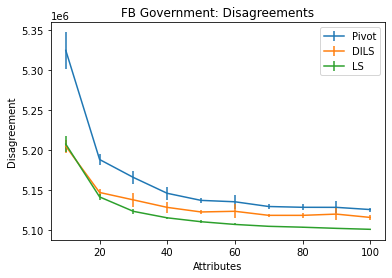

In [11]:
"""
Score Plots (Disagreement to Input Clusterings): 
"""

attributes = [x for x in range(10, 101, 10)]

scores1 = [[5356133,5341433,5289441,5314691,5290047,5308575,5348457,5336543,5320831,5343219],
[5190865,5199045,5182645,5199257,5191841,5187213,5175749,5182841,5184581,5191973],
[5158405,5158153,5173311,5161693,5165685,5157299,5176023,5184161,5159459,5167769],
[5152053,5143267,5141069,5140531,5167851,5137185,5145581,5146749,5146873,5142829],
[5134255,5139863,5135925,5133647,5142717,5136625,5140037,5139829,5137401,5135301],
[5136155,5154681,5133457,5125967,5124645,5134349,5133611,5147211,5132835,5135303],
[5128385,5128773,5128857,5131933,5130991,5131671,5128141,5135801,5127971,5126539],
[5126765,5125903,5127479,5130107,5121851,5133213,5126825,5134577,5128331,5134223],
[5123979,5129247,5128827,5129231,5120693,5139533,5145285,5127881,5120861,5123071],
[5126331,5124063,5129149,5127035,5125473,5126803,5124903,5127087,5129805,5120417]]

### HYBRID ###

h_scores1 = [[5197377,5221993,5199613,5205873,5198723,5195403,5205943,5207965,5201101,5214283],
[5144441,5153677,5145377,5150707,5149885,5141729,5140489,5144213,5144791,5155365],
[5132139,5136805,5141929,5130829,5140767,5133887,5129087,5159051,5136241,5141343],
[5131585,5124483,5125897,5123389,5147969,5123875,5131737,5126757,5125115,5126163],
[5121175,5125857,5119741,5122793,5127075,5122745,5125481,5120467,5124127,5121829],
[5121481,5144731,5122217,5115791,5115585,5117065,5122953,5134617,5119899,5124503],
[5119193,5117275,5120091,5118439,5118041,5118907,5119025,5123989,5116095,5116079],
[5116029,5116973,5117559,5118005,5113351,5123141,5116919,5122373,5117037,5125465],
[5117175,5118135,5120935,5121261,5111175,5131093,5138029,5117763,5112535,5114317],
[5117359,5112989,5117509,5117997,5112959,5116085,5117105,5118727,5118933,5110835]]

h_scores2 = [[5197941,5219365,5199847,5210451,5197759,5194567,5205009,5211607,5199195,5215873],
[5145247,5153997,5146195,5151073,5150727,5142323,5140789,5143449,5144773,5155709],
[5132177,5136839,5142531,5130703,5140481,5134551,5127929,5158889,5135641,5141993],
[5132027,5125021,5125807,5123331,5148115,5124157,5131557,5127115,5125365,5125645],
[5121013,5126031,5119935,5122875,5126781,5122075,5125483,5120797,5123723,5122225],
[5121901,5144779,5122149,5115743,5115655,5116821,5123069,5134791,5119701,5124727],
[5119225,5117161,5120537,5118165,5118387,5119221,5119111,5124497,5116303,5116131],
[5116029,5117233,5117757,5118341,5113621,5123229,5117097,5122673,5117201,5125389],
[5117461,5118667,5120985,5121273,5111251,5131197,5138283,5117745,5112861,5114503],
[5117283,5113523,5117937,5118043,5113313,5116303,5117087,5118959,5119515,5110821]]

l_scores1 = [[5202063,5230547,5204511,5215675,5197601,5202445,5208071,5216979,5199019,5201317],
[5139995,5138463,5141277,5147185,5148789,5139419,5139629,5139033,5139183,5145807],
[5120851,5126113,5121053,5122319,5120433,5123005,5124925,5127379,5123849,5128589],
[5117517,5117613,5115155,5113189,5116649,5115903,5115527,5116365,5114331,5115425],
[5110483,5112297,5109495,5110767,5110877,5111759,5109439,5110031,5114643,5109193],
[5108735,5106637,5108891,5105621,5105919,5107241,5107515,5109229,5108671,5106785],
[5104487,5104493,5104693,5106491,5104995,5105307,5105769,5105985,5105227,5104245],
[5104415,5105437,5103327,5103959,5103793,5102953,5104017,5104561,5104301,5103791],
[5101451,5102865,5103475,5102649,5103295,5103223,5102829,5101693,5103123,5101673],
[5101213,5100931,5101769,5102995,5101131,5100587,5101919,5101131,5102073,5100359]]

scores = [scores1[i] for i in range(len(attributes))]
plot_scores = [np.mean(s) for s in scores]
err_scores = [np.std(s) for s in scores]

print("Pivot multiple increase of cost for smallest sample:", plot_scores[0] / plot_scores[-1])

h_scores = [h_scores1[i] for i in range(len(attributes))]
h_plot_scores = [np.mean(s) for s in h_scores]
h_err_scores = [np.std(s) for s in h_scores]

h1_scores = [h_scores2[i] for i in range(len(attributes))]
h1_plot_scores = [np.mean(s) for s in h1_scores]
h1_err_scores = [np.std(s) for s in h1_scores]

l_scores = [l_scores1[i] for i in range(len(attributes))]
l_plot_scores = [np.mean(s) for s in l_scores]
l_err_scores = [np.std(s) for s in l_scores]

print("LS relative decrease from ILS at R = 100:", 100 * (h1_plot_scores[-1] - l_plot_scores[-1] ) / h1_plot_scores[-1])


plt.title("FB Government: Disagreements")
plt.xlabel("Attributes")
plt.ylabel("Disagreement")
plt.errorbar(attributes, plot_scores, err_scores, label="Pivot")
#plt.errorbar(attributes, h_plot_scores, h_err_scores, label="RILS")
plt.errorbar(attributes, h1_plot_scores, h1_err_scores, label="DILS")
plt.errorbar(attributes, l_plot_scores, l_err_scores, label="LS")
plt.legend()
plt.show()



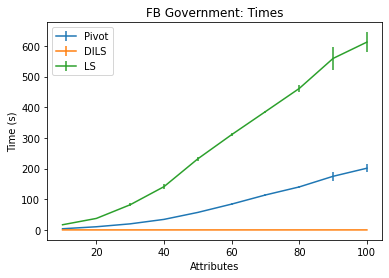

In [12]:
"""
Time Plots: 
"""

attributes = [x for x in range(10, 101, 10)]

scores1 = [[3.947,3.827,3.98,3.643,3.811,3.887,3.761,4.029,4.191,3.966],
[10.434,10.563,10.45,9.972,10.694,10.498,11.039,10.267,9.957,10.017],
[19.321,19.999,21.362,20.169,19.849,18.278,20.339,18.903,20.145,20.299],
[32.321,36.633,31.743,32.286,32.784,38.804,34.829,33.628,36.086,35.143],
[55.859,56.647,58.736,55.033,56.171,56.413,57.27,57.005,57.107,61.377],
[83.516,76.667,85.397,85.959,84.473,83.698,85.162,84.614,86.048,87.088],
[114.623,115.726,116.226,112.735,114.723,114.729,109.504,114.991,114.814,111.958],
[139.56,138.325,141.906,135.769,134.544,139.129,140.361,140.661,145.133,147.6],
[192.059,167.666,172.536,169.022,164.915,178.401,158.715,172.989,162.075,210.764],
[217.018,212.562,224.667,203.37,200.655,189.279,201.439,197.717,186.845,179.298]]

### HYBRID ###

h_scores1 = [[0.197,0.192,0.156,0.19,0.175,0.182,0.187,0.184,0.154,0.186],
[0.145,0.114,0.115,0.133,0.113,0.121,0.114,0.113,0.109,0.128],
[0.102,0.103,0.101,0.117,0.121,0.101,0.106,0.105,0.116,0.108],
[0.105,0.099,0.095,0.099,0.109,0.107,0.101,0.114,0.107,0.097],
[0.098,0.115,0.104,0.104,0.105,0.106,0.099,0.108,0.11,0.106],
[0.105,0.103,0.121,0.105,0.107,0.109,0.109,0.103,0.106,0.102],
[0.104,0.107,0.103,0.107,0.1,0.107,0.102,0.103,0.108,0.105],
[0.108,0.106,0.103,0.109,0.109,0.109,0.107,0.11,0.108,0.105],
[0.105,0.11,0.104,0.109,0.111,0.107,0.101,0.108,0.11,0.115],
[0.108,0.116,0.114,0.111,0.117,0.116,0.104,0.105,0.113,0.123]]

l_scores1 = [[17.175,16.769,16.853,16.52,16.091,16.944,16.972,17.349,17.214,17.63],
[37.621,36.226,36.984,36.808,39.095,37.752,38.819,39.139,36.5,36.767],
[85.241,87.614,82.31,83.822,80.289,79.497,88.217,75.146,83.97,75.183],
[131.814,136.275,142.156,133.527,132.195,150.6,138.513,148.787,157.539,139.995],
[220.082,229.591,237.471,228.485,232.129,228.597,230.247,231.934,239.189,240.935],
[312.967,306.804,304.001,306.632,315.719,301.633,310.001,314.21,314.61,319.907],
[385.666,392.862,387.95,385.964,383.445,383.048,386.595,385.928,380.804,386.253],
[454.664,457.623,458.109,451.203,460.2,453.69,464.27,457.672,467.237,488.98],
[537.929,539.102,535.775,536.49,527.825,551.253,549.925,552.194,607.212,654.464],
[649.143,668.352,632.917,636.925,603.978,614.564,593.219,580.301,582.024,563.202]]

scores = [scores1[i] for i in range(len(attributes))]
plot_scores = [np.mean(s) for s in scores]
err_scores = [np.std(s) for s in scores]

h_scores = [h_scores1[i] for i in range(len(attributes))]
h_plot_scores = [np.mean(s) for s in h_scores]
h_err_scores = [np.std(s) for s in h_scores]

l_scores = [l_scores1[i] for i in range(len(attributes))]
l_plot_scores = [np.mean(s) for s in l_scores]
l_err_scores = [np.std(s) for s in l_scores]

plt.title("FB Government: Times")
plt.xlabel("Attributes")
plt.ylabel("Time (s)")
plt.errorbar(attributes, plot_scores, err_scores, label="Pivot")
plt.errorbar(attributes, h_plot_scores, h_err_scores, label="DILS")
plt.errorbar(attributes, l_plot_scores, l_err_scores, label="LS")
plt.legend()
plt.show()
